# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd 
import scipy.sparse
import scipy.stats

from pandas.plotting import scatter_matrix

# Read in the Data

In [2]:
df_item_categories = pd.read_csv('./data/item_categories.csv')
df_items = pd.read_csv('./data/items.csv')
df_sales_train = pd.read_csv('./data/sales_train_v2.csv')
df_shops = pd.read_csv('./data/shops.csv')
df_test = pd.read_csv('./data/test.csv')

# Data Overview

In [3]:
# Review data shape
print("Train shape = ", df_sales_train.shape)
print("Test shape = ", df_test.shape)

Train shape =  (2935849, 6)
Test shape =  (214200, 3)


In [4]:
# Preview the data
print("df_item_categories preview: ", df_item_categories.head(10))
print("df_items preview: ", df_items.head(10))
print("df_sales_train preview: ", df_sales_train.head(10))
print("df_shops preview: ", df_shops.head(10))
print("df_test preview: ", df_test.head(10))

df_item_categories preview:          item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
5      Аксессуары - PSVita                 5
6    Аксессуары - XBOX 360                 6
7    Аксессуары - XBOX ONE                 7
8           Билеты (Цифра)                 8
9          Доставка товара                 9
df_items preview:                                             item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   
5  ***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ  (UNI)         ...        5   
6 

In [5]:
# Look at the stats for each dataset
print("df_item_categories statistics: ", df_item_categories.describe())
print("df_items statistics: ", df_items.describe())
print("df_sales_train statistics: ", df_sales_train.describe())
print("df_shops statistics: ", df_shops.describe())
print("df_test statistics: ", df_test.describe())

df_item_categories statistics:         item_category_id
count         84.000000
mean          41.500000
std           24.392622
min            0.000000
25%           20.750000
50%           41.500000
75%           62.250000
max           83.000000
df_items statistics:             item_id  item_category_id
count  22170.00000      22170.000000
mean   11084.50000         46.290753
std     6400.07207         15.941486
min        0.00000          0.000000
25%     5542.25000         37.000000
50%    11084.50000         40.000000
75%    16626.75000         58.000000
max    22169.00000         83.000000
df_sales_train statistics:         date_block_num       shop_id       item_id    item_price  item_cnt_day
count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06
mean     1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02  1.242641e+00
std      9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03  2.618834e+00
min      0.000000e+00  0.000000e+00  0.000000e+00 -1.0000

In [6]:
# Check the data types
print("df_item_categories datatypes: ", df_item_categories.dtypes)
print("df_items datatypes: ", df_items.dtypes)
print("df_sales_train datatypes: ", df_sales_train.dtypes)
print("df_shops datatypes: ", df_shops.dtypes)
print("df_test datatypes: ", df_test.dtypes)

df_item_categories datatypes:  item_category_name    object
item_category_id       int64
dtype: object
df_items datatypes:  item_name           object
item_id              int64
item_category_id     int64
dtype: object
df_sales_train datatypes:  date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object
df_shops datatypes:  shop_name    object
shop_id       int64
dtype: object
df_test datatypes:  ID         int64
shop_id    int64
item_id    int64
dtype: object


In [7]:
# Get the dataframe info
print("df_item_categories info: ", df_item_categories.info())
print("df_items info: ", df_items.info())
print("df_sales_train info: ", df_sales_train.info())
print("df_shops info: ", df_shops.info())
print("df_test info: ", df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
item_category_name    84 non-null object
item_category_id      84 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
df_item_categories info:  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
item_name           22170 non-null object
item_id             22170 non-null int64
item_category_id    22170 non-null int64
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
df_items info:  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
df_sales_train info:  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data colu

# See if there are any NaN's

In [30]:
# Number of NaNs for each object
print(df_item_categories.isnull().sum())
print(df_items.isnull().sum())
print(df_sales_train.isnull().sum())
print(df_shops.isnull().sum())
print(df_test.isnull().sum())

item_category_name    0
item_category_id      0
dtype: int64
item_name           0
item_id             0
item_category_id    0
dtype: int64
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
shop_name    0
shop_id      0
dtype: int64
ID         0
shop_id    0
item_id    0
dtype: int64


# Data Visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

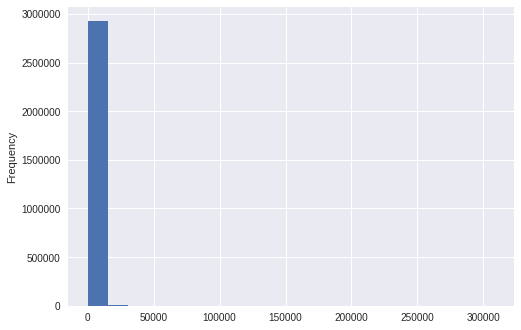

In [11]:
# Let's first look at histograms in the data. Check out item_price.
plt.figure()
df_sales_train['item_price'].plot.hist(bins=20)
plt.show()

In [12]:
# It appears that there are a very few high priced items high priced items from the above histogram, so let's try to 
# find that cutoff
print(df_sales_train.loc[df_sales_train['item_price']>50000, 'item_price'].count())

3


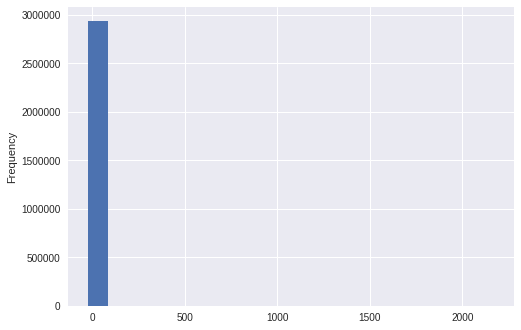

In [13]:
# There are only 3 items above 50,000 in price!  In fact, the mean price (from the descriptive stats above is 891,
# while the max is 307,980!  Let's do the same for item count per day.
plt.figure()
df_sales_train['item_cnt_day'].plot.hist(bins=20)
plt.show()

In [14]:
# Looks like we have the same situation with the item counts per day.  Again, let' try to find the cutoff.
print(df_sales_train.loc[df_sales_train['item_cnt_day']>600, 'item_cnt_day'].count())

5


In [15]:
# Drop the date and item_name columns
sales = df_sales_train.drop(['date'], axis=1)
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


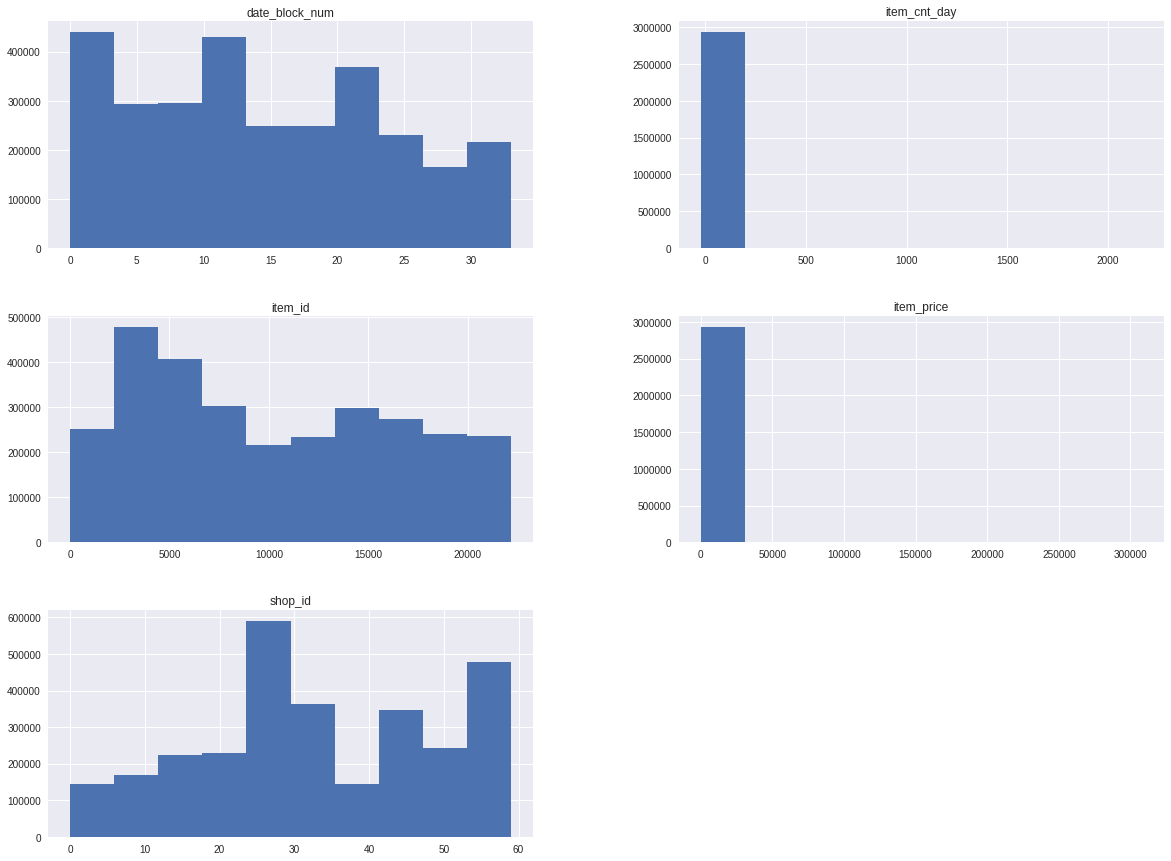

In [16]:
sales.hist(figsize=(20,15))
plt.show()

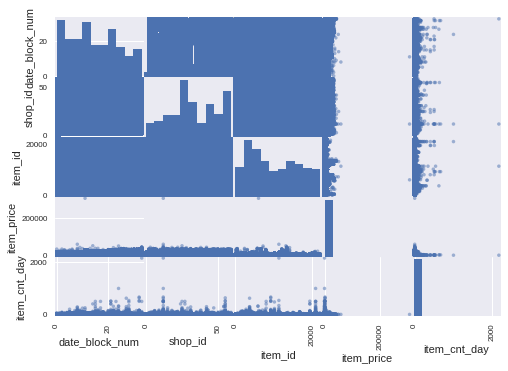

In [17]:
scatter_matrix(sales)
plt.show()

### EDA on sales.csv
This dataset, containing the mean encodings and lags taught in the class, was produced by the PredictSalesKaggleContest-CreateSalesDataset notebook

In [18]:
# Read in the sales dataset with encodings and lags
sales = pd.read_csv('./sales.csv')
sales.head()

,shop_id,item_id,date_block_num,item_cnt_day,item_price,item_category_id,item_id_mean_item_price,item_id_sum_item_cnt_day,item_id_mean_item_cnt_day,shop_id_mean_item_price,...,item_id_mean_item_price_lag_12,item_id_sum_item_cnt_day_lag_12,item_id_mean_item_cnt_day_lag_12,shop_id_mean_item_price_lag_12,shop_id_sum_item_cnt_day_lag_12,shop_id_mean_item_cnt_day_lag_12,item_category_id_mean_item_price_lag_12,item_category_id_sum_item_cnt_day_lag_12,item_category_id_mean_item_cnt_day_lag_12,item_cnt_day_lag_12
0,54,10297,12,4.0,749.0,37,244.23914,23.0,0.500000,231.27406,...,45.869564,0.0,0.0,97.32444,0.0,0.0,44.715256,0.0,0.0,0.0
1,54,10296,12,3.0,1599.0,38,441.04350,17.0,0.369565,231.27406,...,45.869564,0.0,0.0,97.32444,0.0,0.0,44.715256,0.0,0.0,0.0
2,54,10298,12,14.0,399.0,40,297.76086,182.0,3.956522,231.27406,...,45.869564,0.0,0.0,97.32444,0.0,0.0,44.715256,0.0,0.0,0.0
3,54,10300,12,3.0,699.0,37,182.34782,26.0,0.565217,231.27406,...,45.869564,0.0,0.0,97.32444,0.0,0.0,44.715256,0.0,0.0,0.0
4,54,10284,12,1.0,299.0,57,19.50000,3.0,0.065217,231.27406,...,45.869564,0.0,0.0,97.32444,0.0,0.0,44.715256,0.0,0.0,0.0


In [19]:
sales.describe()

,shop_id,item_id,date_block_num,item_cnt_day,item_price,item_category_id,item_id_mean_item_price,item_id_sum_item_cnt_day,item_id_mean_item_cnt_day,shop_id_mean_item_price,...,item_id_mean_item_price_lag_12,item_id_sum_item_cnt_day_lag_12,item_id_mean_item_cnt_day_lag_12,shop_id_mean_item_price_lag_12,shop_id_sum_item_cnt_day_lag_12,shop_id_mean_item_cnt_day_lag_12,item_category_id_mean_item_price_lag_12,item_category_id_sum_item_cnt_day_lag_12,item_category_id_mean_item_cnt_day_lag_12,item_cnt_day_lag_12
count,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,...,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06,6.639294e+06
mean,3.187439e+01,1.126362e+04,2.199694e+01,2.913006e-01,1.235199e+02,4.495836e+01,1.235199e+02,1.496057e+01,3.133425e-01,1.235199e+02,...,9.873051e+01,1.268283e+01,2.701557e-01,1.018148e+02,1.225710e+03,1.606030e-01,7.629997e+01,4.298140e+03,1.792829e-01,2.538717e-01
std,1.726668e+01,6.271893e+03,6.461452e+00,1.459501e+00,7.178392e+02,1.573942e+01,4.973484e+02,9.368426e+01,1.937222e+00,6.787619e+01,...,3.264728e+02,1.002370e+02,2.136617e+00,3.457898e+01,1.906228e+03,2.463791e-01,2.200103e+02,7.748935e+03,1.733503e+00,1.484130e+00
min,2.000000e+00,0.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.800000e+01,-3.913043e-01,0.000000e+00,...,2.666667e-02,-2.000000e+00,-4.444445e-02,2.329451e-02,0.000000e+00,0.000000e+00,1.038043e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.700000e+01,5.680000e+03,1.600000e+01,0.000000e+00,0.000000e+00,3.700000e+01,7.960000e+00,1.000000e+00,2.325581e-02,8.486083e+01,...,4.586956e+01,0.000000e+00,0.000000e+00,9.732444e+01,0.000000e+00,0.000000e+00,4.471526e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.300000e+01,1.137200e+04,2.200000e+01,0.000000e+00,0.000000e+00,4.000000e+01,2.608163e+01,4.000000e+00,8.000000e-02,1.111840e+02,...,4.586956e+01,0.000000e+00,0.000000e+00,9.732444e+01,0.000000e+00,0.000000e+00,4.471526e+01,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.700000e+01,1.653600e+04,2.700000e+01,0.000000e+00,0.000000e+00,5.600000e+01,8.116279e+01,1.100000e+01,2.291667e-01,1.508317e+02,...,4.586956e+01,8.000000e+00,1.666667e-01,9.732444e+01,1.920000e+03,2.573468e-01,4.471526e+01,6.094000e+03,2.207655e-01,0.000000e+00
max,5.900000e+01,2.216900e+04,3.400000e+01,4.500000e+01,4.978200e+04,8.300000e+01,2.408645e+04,1.218500e+04,2.437000e+02,4.426968e+02,...,2.255054e+04,1.255700e+04,2.729783e+02,3.474158e+02,1.631800e+04,1.925655e+00,2.255054e+04,3.627700e+04,2.729783e+02,4.500000e+01


In [20]:
print(sales['shop_id'].nunique(), sales['item_id'].nunique(), (sales['shop_id'].nunique() * sales['item_id'].nunique()))

55 17432 958760


In [21]:
sales.corr()

,shop_id,item_id,date_block_num,item_cnt_day,item_price,item_category_id,item_id_mean_item_price,item_id_sum_item_cnt_day,item_id_mean_item_cnt_day,shop_id_mean_item_price,...,item_id_mean_item_price_lag_12,item_id_sum_item_cnt_day_lag_12,item_id_mean_item_cnt_day_lag_12,shop_id_mean_item_price_lag_12,shop_id_sum_item_cnt_day_lag_12,shop_id_mean_item_cnt_day_lag_12,item_category_id_mean_item_price_lag_12,item_category_id_sum_item_cnt_day_lag_12,item_category_id_mean_item_cnt_day_lag_12,item_cnt_day_lag_12
shop_id,1.000000,-0.000168,0.003752,0.014318,0.003612,-0.000290,0.000514,0.000301,0.000224,0.038203,...,-0.005995,-0.004966,-0.005066,0.076946,0.040829,0.040089,-0.005189,-0.028020,-0.004032,0.009698
item_id,-0.000168,1.000000,-0.015147,-0.036515,-0.055849,0.168946,-0.080608,-0.019356,-0.019618,-0.002609,...,-0.089372,-0.020666,-0.020739,-0.003972,0.001823,0.000844,-0.090922,0.083261,-0.007573,-0.042931
date_block_num,0.003752,-0.015147,1.000000,-0.016057,0.009602,0.029085,0.013859,-0.016081,-0.011910,0.101547,...,0.025656,0.009441,0.004872,0.094887,-0.060187,-0.002199,0.029783,-0.140673,0.008230,0.003177
item_cnt_day,0.014318,-0.036515,-0.016057,1.000000,0.265136,-0.063252,0.222664,0.590877,0.593900,0.140656,...,0.053084,0.270196,0.270519,0.056752,0.026590,0.025214,0.039138,-0.027592,0.265605,0.231210
item_price,0.003612,-0.055849,0.009602,0.265136,1.000000,-0.119702,0.692841,0.120654,0.121706,0.094556,...,0.191387,0.037859,0.038005,0.025483,-0.015655,-0.015761,0.198544,-0.059774,0.020416,0.067234
item_category_id,-0.000290,0.168946,0.029085,-0.063252,-0.119702,1.000000,-0.172770,-0.041904,-0.042275,0.002736,...,-0.146579,-0.036392,-0.036535,0.001435,-0.001297,-0.001156,-0.154319,-0.100362,-0.021649,-0.064942
item_id_mean_item_price,0.000514,-0.080608,0.013859,0.222664,0.692841,-0.172770,1.000000,0.174144,0.175663,0.032858,...,0.265472,0.051670,0.051823,-0.011711,-0.061127,-0.061626,0.276100,-0.088539,0.027457,0.068014
item_id_sum_item_cnt_day,0.000301,-0.019356,-0.016081,0.590877,0.120654,-0.041904,0.174144,1.000000,0.998633,0.015775,...,0.033759,0.557783,0.562164,-0.005446,-0.021180,-0.022625,0.023886,-0.024973,0.613468,0.231535
item_id_mean_item_cnt_day,0.000224,-0.019618,-0.011910,0.593900,0.121706,-0.042275,0.175663,0.998633,1.000000,0.016132,...,0.034357,0.557065,0.560219,-0.005259,-0.021972,-0.023071,0.024428,-0.025597,0.611620,0.232818
shop_id_mean_item_price,0.038203,-0.002609,0.101547,0.140656,0.094556,0.002736,0.032858,0.015775,0.016132,1.000000,...,0.015368,0.012329,0.012547,0.515229,0.411666,0.414793,0.012573,0.025604,0.010086,0.103047


From the above, we can see that the following features from the fully engineered set have a high correlation (>0.5) with our target variable item_cnt_day:
* item_id_sum_item_cnt_day
* item_id_mean_item_cnt_day
* item_cnt_day_lag_1

In [22]:
# Save the correlation matrix to a .csv file to enable better examination in a spreadsheet tool
sales_corr = pd.DataFrame(sales.corr())
sales_corr.to_csv('sales_corr.csv')